In [1]:
import os

import pandas as pd

import eval
import numpy
import matplotlib.pyplot as plt
import matplotlib

[]


In [2]:
os.chdir('C:/Users/johan/RustroverProjects/makespan-minimization')
measurements = eval.run()
print("ANNAHME: Alle logs beziehen sich auf die gleichen instanzen und stellen nur unterschiedliche configs dar.")


reading logfile: logs_2024-02-23_12-31-35.txt
reading logfile: logs_better2 (1).txt
reading logfile: logs_better2 (10).txt
reading logfile: logs_better2 (11).txt
reading logfile: logs_better2 (12).txt
reading logfile: logs_better2 (13).txt
reading logfile: logs_better2 (14).txt
reading logfile: logs_better2 (15).txt
reading logfile: logs_better2 (16).txt
reading logfile: logs_better2 (17).txt
reading logfile: logs_better2 (18).txt
reading logfile: logs_better2 (19).txt
reading logfile: logs_better2 (2).txt
reading logfile: logs_better2 (20).txt
reading logfile: logs_better2 (3).txt
reading logfile: logs_better2 (4).txt
reading logfile: logs_better2 (5).txt
reading logfile: logs_better2 (6).txt
reading logfile: logs_better2 (7).txt
reading logfile: logs_better2 (8).txt
reading logfile: logs_better2 (9).txt
reading logfile: logs_better8 (1).txt
reading logfile: logs_better8 (10).txt
reading logfile: logs_better8 (11).txt
reading logfile: logs_better8 (12).txt
reading logfile: logs_better

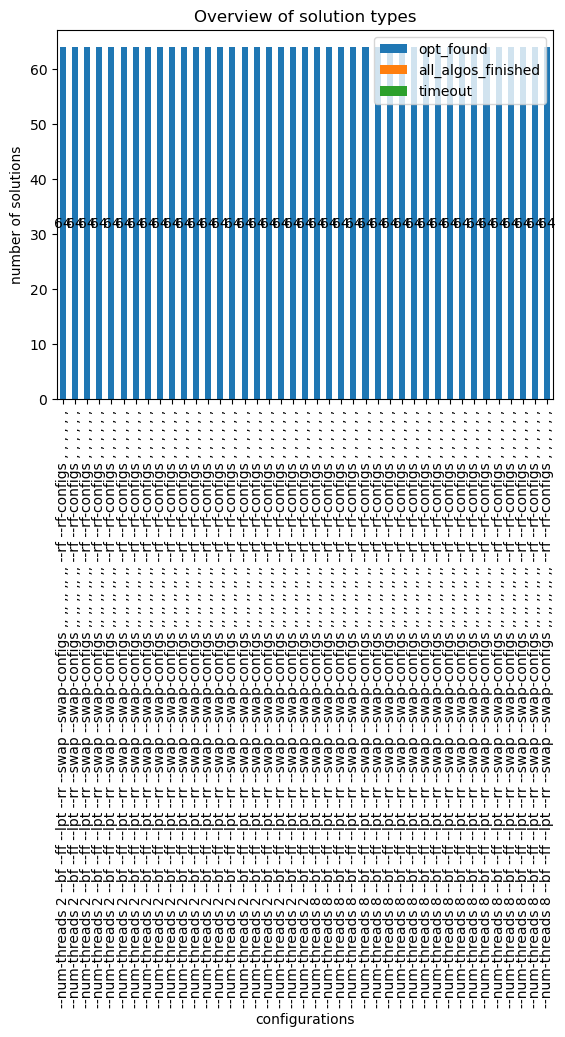

In [3]:
data = []
columns = ["opt_found", "all_algos_finished", "timeout"]
configs = []
for c_id in range(measurements.__len__()):
    (file, instances, runtime, opt_found, all_algos_finished, timeout, upper_bounds, lower_bounds, config,
     instance_names) = measurements[c_id]
    data.append([opt_found, all_algos_finished, timeout])
    configs.append(config)

ax = pd.DataFrame(data, columns=columns, index=configs).plot(kind='bar', stacked=True,
                                                             title="Overview of solution types",
                                                             xlabel='configurations',
                                                             ylabel='number of solutions')

for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


8mean= 0.5856059841463416 
2mean= 0.7798435487804877 


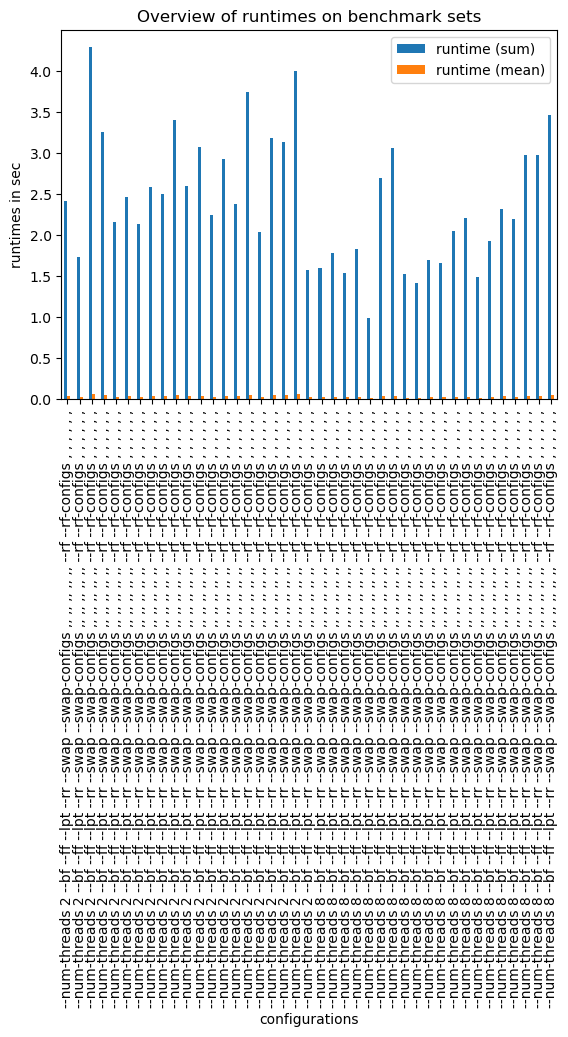

In [4]:
data = []
columns = ["runtime (sum)", "runtime (mean)"]
configs = []
m8 = 0  #todo nur tmp
m2 = 0
for c_id in range(measurements.__len__()):
    (file, instances, runtime, opt_found, all_algos_finished, timeout, upper_bounds, lower_bounds, config,
     instance_names) = measurements[c_id]
    data.append([runtime, runtime / instances])
    configs.append(config)
    if "8" in file:
        m8 += runtime
    if "2" in file:
        m2 += runtime
print(f"8mean= {m8 / measurements.__len__() / 2} ")
print(f"2mean= {m2 / measurements.__len__() / 2} ")

ax = pd.DataFrame(data, columns=columns, index=configs).plot(kind='bar',
                                                             title="Overview of runtimes on benchmark sets",
                                                             xlabel='configurations',
                                                             ylabel='runtimes in sec')

#for c in ax.containers:
#    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
#   ax.bar_label(c, labels=labels, label_type='center')


In [5]:
#TODO idee: runtimes detailed: x=sec y=instances : jeweils pro config eine bar mit der laufzeit auf der instanz (dafür muss eval angepasst werden)

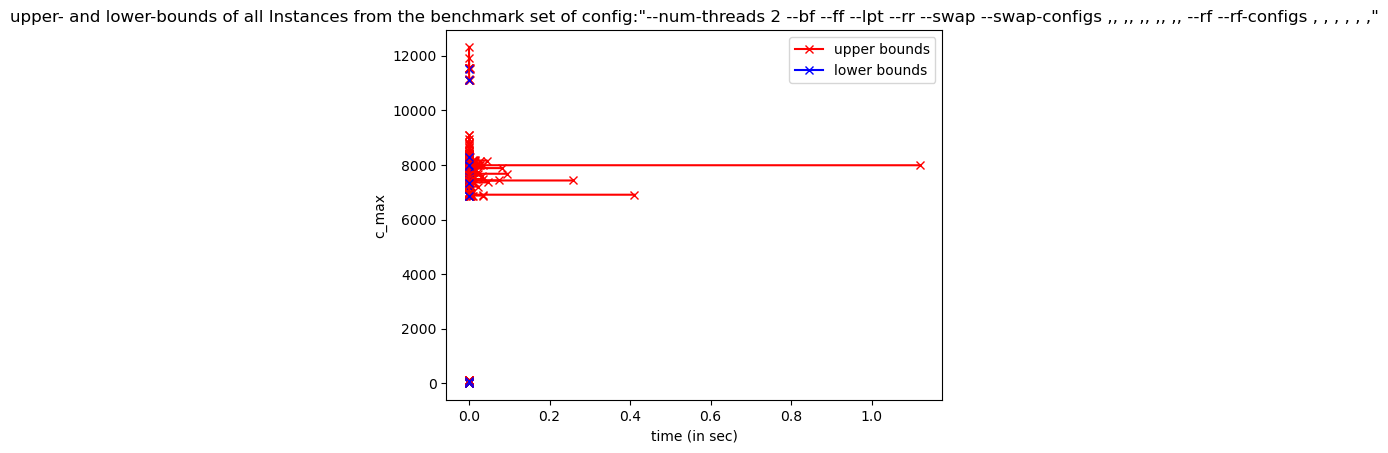

In [6]:
c_id = 0  #gerade nur für config 0 #todo opt einzeichnen (in nächster zelle auch) + mehrere diagramm erzeugen jewils für gleich große eingeben
for i_id in range(measurements[0][1]):
    ubs_i = pd.Series(measurements[c_id][6][i_id][1], measurements[c_id][6][i_id][0]).sort_index()
    lbs_i = pd.Series(measurements[c_id][7][i_id][1], measurements[c_id][7][i_id][0]).sort_index()
    plt.plot(ubs_i, marker='x', color='red')
    plt.plot(lbs_i, marker='x', color='blue')

plt.title(f"upper- and lower-bounds of all Instances from the benchmark set of config:\"{measurements[c_id][8]}\"")
plt.ylabel('c_max')
plt.xlabel('time (in sec)')
plt.legend(['upper bounds', 'lower bounds'], loc='best')
plt.show()

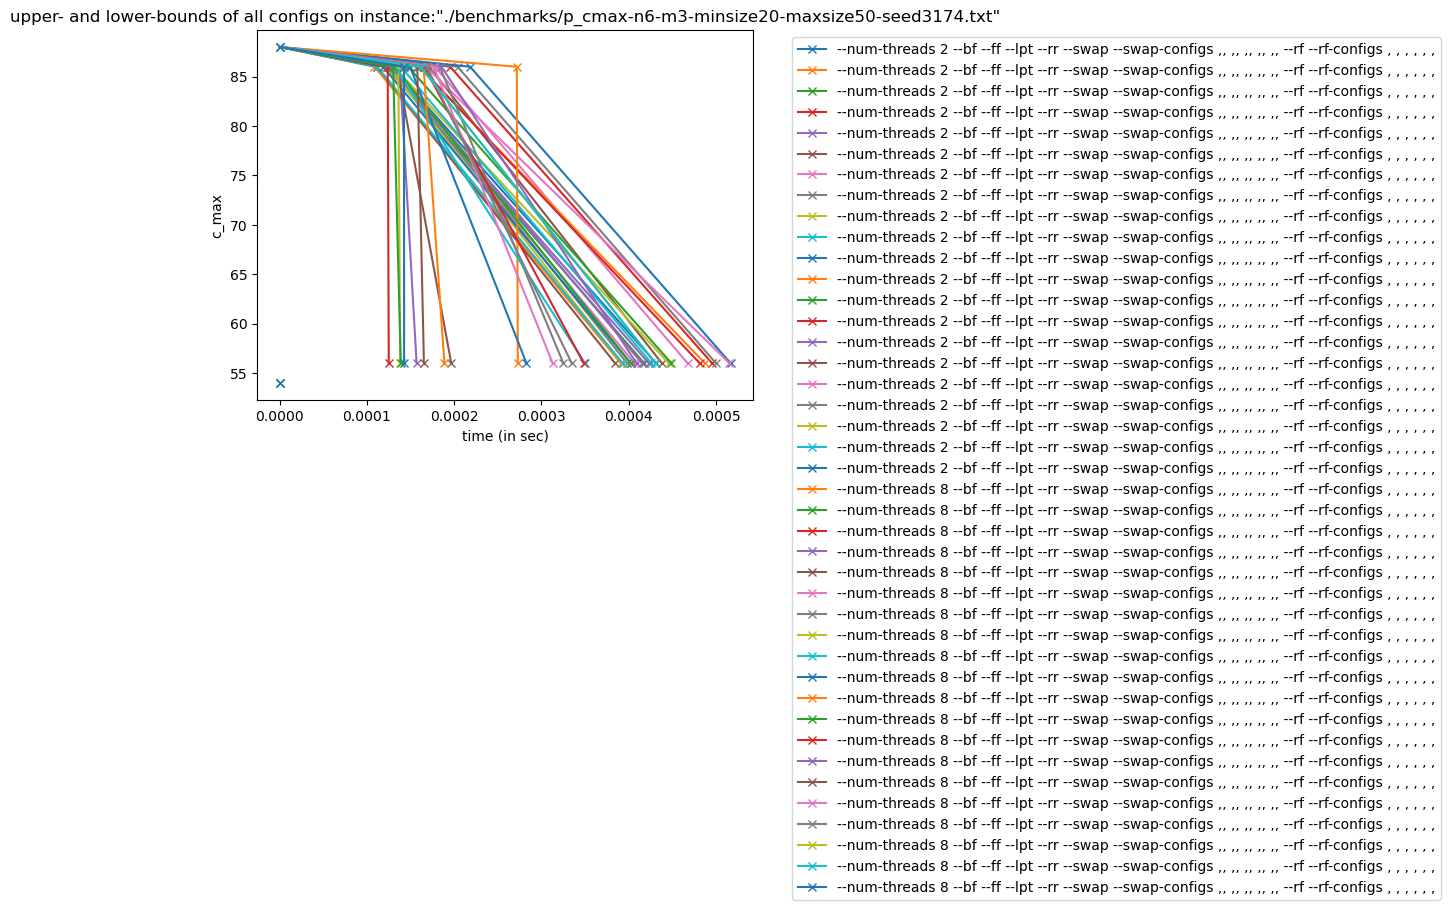

In [10]:
i_id = 60  #gerade nur für instance 0 #todo vllt configs verschieden färben
legend = []
x = []
for c_id in range(measurements.__len__()):
    file = measurements[c_id][0]
    config = measurements[c_id][8]
    #print(config)
    ubs_i = pd.Series(measurements[c_id][6][i_id][1], measurements[c_id][6][i_id][0]).sort_index()
    lbs_i = pd.Series(measurements[c_id][7][i_id][1], measurements[c_id][7][i_id][0]).sort_index()
    n = plt.plot(ubs_i, marker='x')
    plt.plot(lbs_i, marker='x', color=n[0].get_color())

    legend.append(config)
    x.append(n[0])

plt.title(f"upper- and lower-bounds of all configs on instance:\"{measurements[c_id][9][i_id]}\"")
plt.ylabel('c_max')
plt.xlabel('time (in sec)')
plt.legend(x, legend, loc=1, bbox_to_anchor=(2.4, 1))
plt.show()
